<a href="https://colab.research.google.com/github/CoolWolfy96/MAT421/blob/main/Gradient_Ascent_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

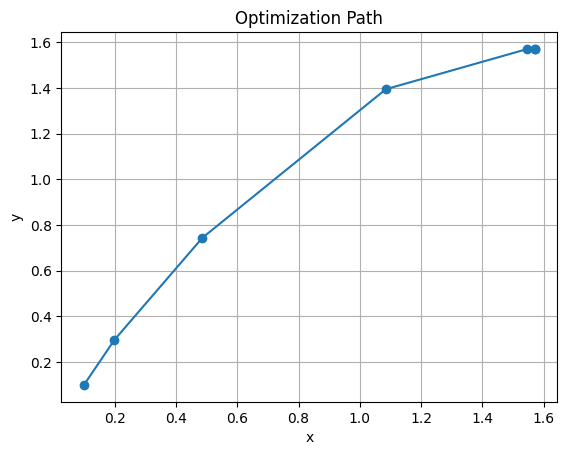

Point of local maximum: [1.57079632679490, 1.57079632679490]
Value of local maximum: 1.00000000000000


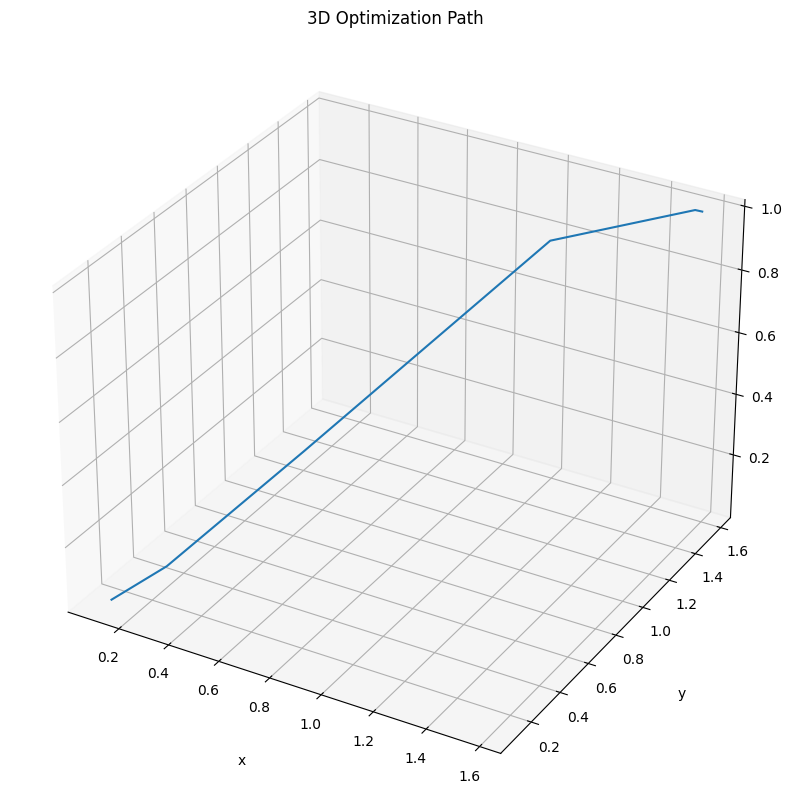

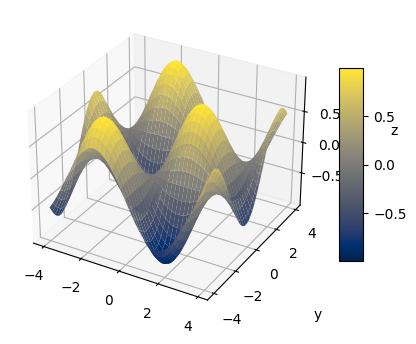

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sympy import symbols, sin, sqrt, diff

x, y = symbols('x y')

def magnitude(vector, p):
    v0 = vector[0].subs([(x, p[0]), (y, p[1])])
    v1 = vector[1].subs([(x, p[0]), (y, p[1])])
    return sqrt(v0**2 + v1**2)

def findMax(f, tol):
    grad = [diff(f,x), diff(f,y)]
    p = [0.1, 0.1]
    points = [p.copy()]
    while magnitude(grad, p) > tol:
        p[0] += grad[0].subs([(x, p[0]), (y, p[1])])
        p[1] += grad[1].subs([(x, p[0]), (y, p[1])])
        points.append(p.copy())
    return points

f = sin(x)*sin(y)
points = findMax(f, 0.000001)

x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]
z_coords = [f.subs([(x, point[0]), (y, point[1])]) for point in points]

# Plotting
plt.plot(x_coords, y_coords, '-o')
plt.title('Optimization Path')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Print final point and its value
final_point = points[-1]
print("Point of local maximum:", final_point)  # point where local maximum was achieved
print("Value of local maximum:", f.subs([(x, final_point[0]), (y, final_point[1])]))  # value of local maximum

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()
ax.plot3D(x_coords, y_coords, z_coords)
ax.set_title('3D Optimization Path')
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)

# Plotting in 3D

fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()
